In [2]:
!pip install pandas_profiling

  Created wheel for pandas-profiling: filename=pandas_profiling-2.4.0-py2.py3-none-any.whl size=195596 sha256=17f8e8f73d3078aeb1d8436d86d616eaff1c705cc05d18b77935d014ca29951b
  Stored in directory: C:\Users\jungg\AppData\Local\pip\Cache\wheels\b2\4b\40\ff4633a59f4e7fbdfec19b8e10e353b54b5eef125c31afe51a
  Created wheel for confuse: filename=confuse-1.0.0-cp37-none-any.whl size=17494 sha256=8b1a171cf2387a58ba4bd2a7437722a7ea0569353b66de2a39eb9510c5dfb607
  Stored in directory: C:\Users\jungg\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27090 sha256=0789364242b3b43aa68437d5bed09b4787a17725291571e4e30c023a632f2ae6
  Stored in directory: C:\Users\jungg\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling confuse htmlmin


# Bank Marketing Data from Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling

In [4]:
df=pd.read_csv('bank.csv')
df.head(12)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


# Explain each columns

- Age: 나이
- Job: 직업
- Marital: 혼인 여부
- Education: 학력
- Default: 파산 여부
- Housing: 주택 융자 여부
- Loan: 대출 여부
- Balance: 잔고('$')
- Contact: 연결방법(전화 or 휴대폰)
- Month: 마지막 연락 월
- Day: 마지막 연락 일
- Duration: 통화 지속 시간
- Campaign: 캠페인 기간동안 연락횟수
- Pday: 마지막 연락으로부터의 일 수 (**-1 means 0 day**)
- Previous: 이전 캠페인에서 이 고객에게 연락한 횟수
- Poutcome: 이전 캠페인에서의 결과
- Deposit: 예금 가입 여부

In [5]:
df.profile_report()

## Need to do one-hot coding variables
### job, marital, education, default, housing, loan, contact, poutcome, deposit

In [4]:
# print(df['contact'].value_counts(),end='\n\n')
# print(df['deposit'].value_counts(),end='\n\n')
# print(df['education'].value_counts(),end='\n\n')
# print(df['housing'].value_counts(),end='\n\n')
# print(df['job'].value_counts(),end='\n\n')
# print(df['loan'].value_counts(),end='\n\n')
# print(df['marital'].value_counts(),end='\n\n')
# print(df['poutcome'].value_counts(),end='\n\n')


In [5]:
df['contact']=df['contact'].map({'cellular':0.,'unknown':1,'telephone':2}).astype('float32')
df['deposit']=df['deposit'].map({'no':0.,'yes':1}).astype('float32')
df['education']=df['education'].map({'secondary':0,'tertiary':1,'primary':2,'unknown':3}).astype('float32')
df['default']=df['default'].map({'no':0.,'yes':1}).astype('float32')
df['housing']=df['housing'].map({'no':0.,'yes':1}).astype('float32')

df['job']=df['job'].map({'management':0., 'blue-collar':1, 'technician':2., 'admin.':3, 'services':4,
                        'retired':5, 'self-employed':6, 'student':7, 'unemployed':8, 'entrepreneur':9,
                        'housemaid':10., 'unknown':11}).astype('float32')

df['loan']=df['loan'].map({'no':0,'yes':1}).astype('float32')
df['marital']=df['marital'].map({'married':0.,'single':1,'divorced':2}).astype('float32')
df['poutcome']=df['poutcome'].map({'unknown':0.,'failure':1,'success':2,'other':3}).astype('float32')


# Data preprocessing

In [7]:
del df['month']
del df['day']

In [8]:
target = df[['deposit']].copy()
data = df.copy()

del data['deposit']

In [9]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
data=sc.fit_transform(data)

#data[['balance']] = sc.fit_transform(data[['balance']])
#data[['duration']] = sc.fit_transform(data[['duration']])
#data[['age']] = sc.fit_transform(data[['age']])



#print(data[['balance']].shape)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Train, test split

In [10]:
from sklearn import model_selection

train_data, test_data, train_label, test_label = model_selection.train_test_split(data, target,test_size=0.05,random_state=0)

## Applying one-hot encoder

In [ ]:
### from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import utils

enc = OneHotEncoder(categories='auto')

#enc.fit(train_data)
#train_data = enc.transform(train_data).toarray()

#enc.fit(test_data)
#test_data = enc.transform(test_data).toarray()

#enc.fit(train_label)
#train_label = enc.transform(train_label).toarray()

#enc.fit(test_label)
#test_label = enc.transform(test_label).toarray()

#train_data = utils.to_categorical(train_data) # 0~9 -> one-hot vector
#test_data = utils.to_categorical(test_data) # 0~9 -> one-hot vector

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector



In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

# Check the train and test data shape

In [13]:
print(train_data.shape)
print(train_data.shape[0],train_data.shape[1])
dim=train_data.shape[1]

(10603, 14)
10603 14


In [14]:
train_label.shape, train_data.shape

((10603, 2), (10603, 14))

# Using deep learning model

In [15]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=dim, units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.25))

model.add(layers.Dense(units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(rate=0.25))

model.add(layers.Dense(units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.25))

model.add(layers.Dense(units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.25))

model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1
model.summary()

In [16]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy]) 

In [17]:
history = model.fit(train_data, train_label, batch_size=100, epochs=40, validation_split=0.05,verbose=0) 

In [18]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

# Calculate accuray

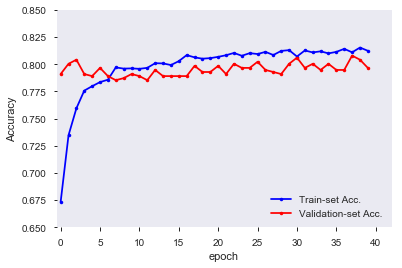

In [19]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

#val_acc = history.history['val_binary_accuracy']
#acc = history.history['binary_accuracy']

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")
plt.xlim(-0.5, 42)
plt.ylim(0.65, 0.85)
plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [20]:
result = model.evaluate(test_data, test_label, batch_size=100)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

559/559 [==============================] - 0s 13us/sample - loss: 0.4381 - categorical_accuracy: 0.8175
loss (cross-entropy) : 0.4381437953128371
test accuracy : 0.8175313


# One-hot encoding and argument max
## Multi-class multi fpr, tpr

In [21]:
from sklearn.metrics import roc_curve, auc

pred_test = model.predict(test_data)
pred_test_prob = model.predict_proba(test_data)

fpr, tpr, _ = roc_curve(y_true=test_label[:,1], y_score=pred_test_prob[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

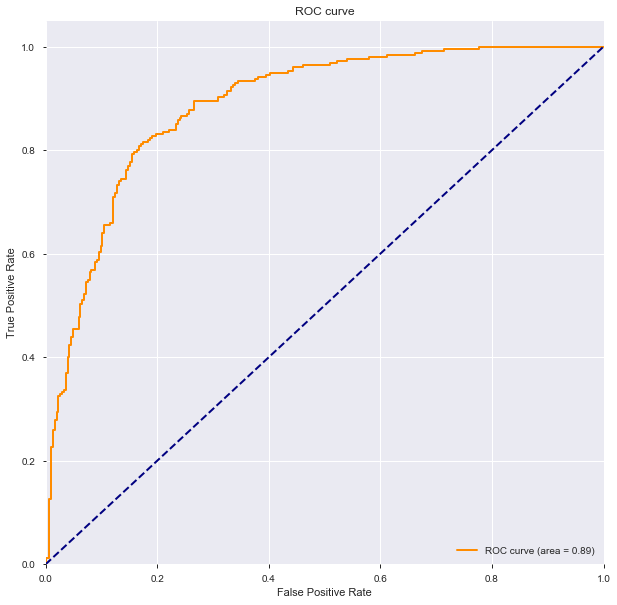

0.8866615067079464


In [22]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

print(roc_auc)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

a1=test_label[:,0] #.reshape(2233,1)
b1=pred_test_prob[:,0] #.reshape(2233,1)

a2=test_label[:,1] #.reshape(2233,1)
b2=pred_test_prob[:,1] #.reshape(2233,1)

b1[b1<0.5]=0
b1[b1>0.5]=1

b2[b2<0.5]=0
b2[b2>0.5]=1

cm1 = confusion_matrix(a1,b1) #, labels=lp_model.classes_)


# Classification report

In [24]:
print(cm1)
print(classification_report(a1,b1))

[[210  45]
 [ 57 247]]
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       255
         1.0       0.85      0.81      0.83       304

   micro avg       0.82      0.82      0.82       559
   macro avg       0.82      0.82      0.82       559
weighted avg       0.82      0.82      0.82       559



In [25]:
len(classification_report(a1,b1))
li_class=classification_report(a1,b1) #.strip() #.split(' ')


# Feature importance using GradientBoosting

In [26]:
from sklearn import decomposition
from sklearn import datasets

from sklearn.ensemble import GradientBoostingClassifier


In [27]:
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'random_state':0, 'subsample':1.0, }

clf = GradientBoostingClassifier(**params)
clf.fit(train_data, train_label[:,0])



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

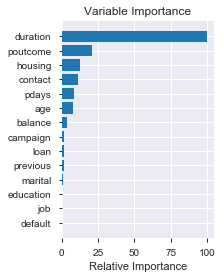

In [28]:
# Plot feature importance


feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

dd=pd.DataFrame(data)
xx=df.columns[sorted_idx]

#print(pd.DataFrame(data))


pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,xx)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()